In [1]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
directorio_de_imagenes="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/IMAGENES/MODELOS"
directorios_de_datos="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/DATA"

In [3]:
# Reading data and removing index col
df = pd.read_csv(f"{directorios_de_datos}/DataAnalyst_preprocesado.csv")
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13


In [4]:
#df=df[((df['Salary Estimate Mean'] >55) & (df['Salary Estimate Mean'] <110))]


## Variable a predecir

In [5]:
#variable a predecir
y=df[["Salary Estimate Mean"]].to_numpy()


## Variables features
- Job Title
- Company Name
- Location
- Headquarters

In [6]:
features_columnas_categoricas=['Job Title','Company Name','Location','Headquarters']
feature_names = features_columnas_categoricas
#df[feature_names[0:len(feature_names)]+ ["Salary Estimate Mean"]]
X=df[feature_names[0:len(feature_names)]]
X

,Job Title,Company Name,Location,Headquarters
0,"Data Analyst, Center on Immigration and Justic...",Vera Institute of Justice,"New York, NY","New York, NY"
1,Quality Data Analyst,Visiting Nurse Service of New York,"New York, NY","New York, NY"
2,"Senior Data Analyst, Insights & Analytics Team...",Squarespace,"New York, NY","New York, NY"
3,Data Analyst,Celerity,"New York, NY","McLean, VA"
4,Reporting Data Analyst,FanDuel,"New York, NY","New York, NY"
...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,"Avacend, Inc.","Denver, CO","Alpharetta, GA"
2249,Senior Data Analyst (Corporate Audit),Arrow Electronics,"Centennial, CO","Centennial, CO"
2250,"Technical Business Analyst (SQL, Data analytic...",Spiceorb,"Denver, CO","Denver, CO"
2251,"Data Analyst 3, Customer Experience",Contingent Network Services,"Centennial, CO","West Chester, OH"


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
#features_columnas_categoricas = ["Pclass","Sex","SibSp","Parch","Embarked"]
one_hot_encoder = OneHotEncoder()
# passthrough significa que no modifique las otras columnas
transformer = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [9]:
transformed_X.nonzero()

(array([   0,    0,    0, ..., 2252, 2252, 2252], dtype=int32),
 array([ 418, 2671, 2928, ..., 2365, 2804, 3088], dtype=int32))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Revisar si se necesita estratificar alguna columna  stratify=
# Split trian (find parameters to minimize the cost function) and test 20 % 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = .2, random_state = 42)


In [12]:
X_train.shape

(1802, 3525)

In [13]:
X_test.shape

(451, 3525)

In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
modelo = SGDRegressor()

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
SGDRegressor?

Init signature:
SGDRegressor(
    loss='squared_error',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD.

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of

In [18]:
parameters = {
    'alpha':[0.0001, 0.001,0.01,0.1],
    'penalty' :['l1','l2'],
    'max_iter':[1000,10000,20000]}



In [19]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [20]:
gridsearch = GridSearchCV(estimator=modelo, param_grid = parameters, n_jobs=-1)
gridsearch.fit(X_train, y_train.reshape(-1))

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

GridSearchCV(estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [1000, 10000, 20000],
                         'penalty': ['l1', 'l2']})

In [21]:
gridsearch.cv_results_

{'mean_fit_time': array([0.10142584, 0.08763843, 0.7890646 , 0.51457634, 0.78771801,
        0.49596682, 0.1120276 , 0.08004346, 0.84078774, 0.36843696,
        0.82759104, 0.43243704, 0.10302548, 0.07399945, 0.75277095,
        0.14104505, 0.80326262, 0.12053819, 0.11241102, 0.06021938,
        0.16036625, 0.05071344, 0.13025656, 0.05321002]),
 'std_fit_time': array([0.0081707 , 0.01260923, 0.04347503, 0.02171515, 0.01868356,
        0.02672992, 0.01176213, 0.01193171, 0.04973558, 0.0166172 ,
        0.0450733 , 0.06814876, 0.00567464, 0.01170374, 0.096587  ,
        0.01283437, 0.07139498, 0.01634641, 0.01496063, 0.01426045,
        0.04053815, 0.00992666, 0.00346087, 0.0058002 ]),
 'mean_score_time': array([0.00065541, 0.00084639, 0.00074081, 0.00048032, 0.00059519,
        0.00069838, 0.00055437, 0.00055313, 0.00074606, 0.00072703,
        0.00056109, 0.00063386, 0.00054569, 0.00061922, 0.00079246,
        0.00046806, 0.00067229, 0.00041323, 0.00046496, 0.00052872,
        0.000559

In [22]:
gridsearch.best_params_

{'alpha': 0.01, 'max_iter': 20000, 'penalty': 'l2'}

In [23]:
def getParam(params:dict,paramName:str):
    return params[paramName]

In [24]:
model_regresion=SGDRegressor(alpha=getParam(gridsearch.best_params_,'alpha'),max_iter=getParam(gridsearch.best_params_,'max_iter'),penalty=getParam(gridsearch.best_params_,'penalty'))
model_regresion

SGDRegressor(alpha=0.01, max_iter=20000)

In [25]:
model_regresion.fit(X_train,y_train.reshape(-1))

SGDRegressor(alpha=0.01, max_iter=20000)

In [26]:
y_train_predict=model_regresion.predict(X_train)

In [27]:
y_predict=model_regresion.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [29]:
def getMetrics(y_true,y_preds):
    metric_results=dict()
    mse=mean_squared_error(y_true, y_preds)
    metric_results["mse"]=mse
    rmse=root_mean_squared_error(y_true, y_preds)
    metric_results["rmse"]=rmse
    msa=mean_absolute_error(y_true, y_preds)
    metric_results["msa"]=msa
    r2_s=r2_score(y_true, y_preds)
    metric_results["r2"]=r2_s

    return metric_results

def printMetrics(model_name,y_true,y_preds):
    metric_results=getMetrics(y_true,y_preds)
    print(f"showing metrics of {model_name}:")
    for key  in metric_results:
        print(f"{key}: {metric_results[key]}")
    print("\n")
    return metric_results

def pretyMetricString(metrics:dict):
    return "mse:%.3f rmse:%.3f msa:%.3f r2:%.3f" % (
        float(metrics["mse"].round(3)),
        float(metrics["rmse"].round(3)),
        float(metrics["msa"].round(3)),
        float(metrics["r2"].round(3)))

In [30]:
linear_regresion_metrics_train=printMetrics("Linear regresion SKLearn",y_train.reshape(-1),y_train_predict)

showing metrics of Linear regresion SKLearn:
mse: 305.36726576943937
rmse: 17.47476082152312
msa: 13.149993403941421
r2: 0.4375969540892689




In [31]:
linear_regresion_metrics=printMetrics("Linear regresion SKLearn",y_test.reshape(-1),y_predict)


showing metrics of Linear regresion SKLearn:
mse: 450.8226069538532
rmse: 21.23258361466765
msa: 16.058213257385987
r2: 0.26148706831171054




# Grafica de y_test vs y_predicted


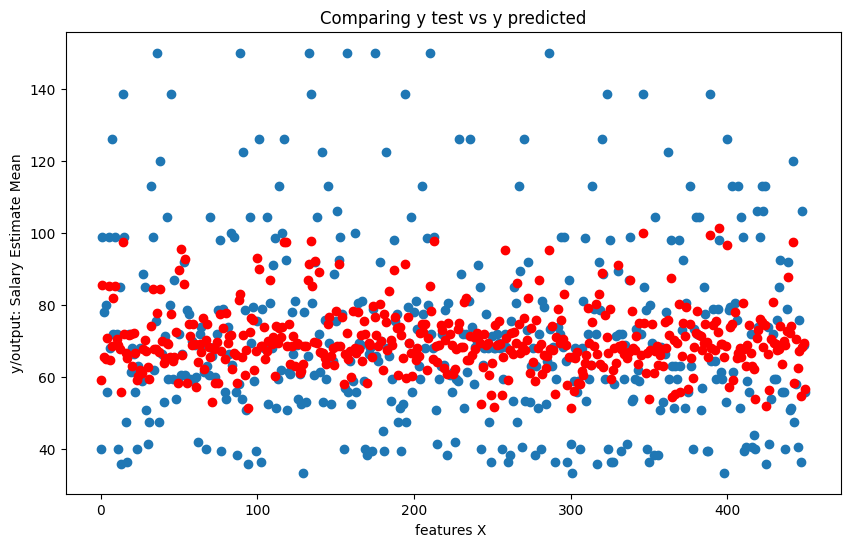

In [32]:
y_test_reshaped=y_test.reshape(-1)
x_cord=np.arange(0,len(y_test_reshaped),1)
plt.figure(figsize=(10,6))
plt.scatter(x_cord, y_test_reshaped, label = "Data points test")
plt.scatter(x_cord, y_predict, label = "Data points test",c= 'r')
plt.xlabel("features X ")
plt.ylabel(f"y/output: Salary Estimate Mean")
plt.title("Comparing y test vs y predicted")
save_image_file="regresion_model"
plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
plt.show()

DecisionTreeRegressor
https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [53]:
regressor = DecisionTreeRegressor(random_state=0)

In [54]:
cross_val_score(regressor, X_train,y_train.reshape(-1), cv=10)

AttributeError: 'Series' object has no attribute 'reshape'

# Modelo KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
def test_KNN(X_train,y_train,X_test,y_test,min_k:int,max_k:int) -> list:

    error_rate = []
    accuracy_score_list =[]

    for i in range(min_k, max_k):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
    
        # Error history
        error_rate.append(np.mean(pred_i != y_test))
        accuracy_score_list.append(accuracy_score(y_test, pred_i))
    
    return error_rate,accuracy_score_list

In [37]:
def plot_error_rate(error_rate,accuracy_score_list,directorio_de_imagenes=None,save_image_file=None):
    plt.figure(figsize = (10, 6))
    plt.plot(range(1, len(error_rate)+1), error_rate, color = "blue",
         linestyle = "dashed",
         marker='o', markerfacecolor="red", markersize=10)
    
    K_xpos=error_rate.index(min(error_rate))
    min_err_y=min(error_rate)

    plt.plot(K_xpos+1,min_err_y,'go',markersize=11,markerfacecolor="blue") 

    plt.title("Error Rate vs K-Value")
    plt.xlabel("K")
    plt.ylabel("Error Rate")

    if directorio_de_imagenes!=None and save_image_file!=None:
          plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')

    plt.show()

    print(f"Min Error: {min_err_y}, at K={K_xpos}")
    print(f"Accuracy: {accuracy_score_list[K_xpos]}")

In [38]:
def convertirCategoricasA_Numericas(df_original,columnas):
    df_copy=df_original.copy() 
    #Transformar columnas
    for col in columnas:
        labelEncoder = LabelEncoder()
        df_copy[col]=labelEncoder.fit_transform(df_copy[col])

    # Borrar columnas originales
    #for col in columnas:
    #    del  df_copy[col]  
    return df_copy

In [39]:
df_salary=convertirCategoricasA_Numericas(df[['Salary Estimate Mean']],['Salary Estimate Mean'])
y=df_salary['Salary Estimate Mean']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = .2, random_state = 42)

# Prueba usando KNN 
- Tiene un desempeño bastante bajo con el 26 % de aciertos en la prediccion

In [41]:
# supervisado por la y, sin Y es no supervisado
error_rate,accuracy_score_list=test_KNN(X_train,y_train,X_test,y_test,1,100)

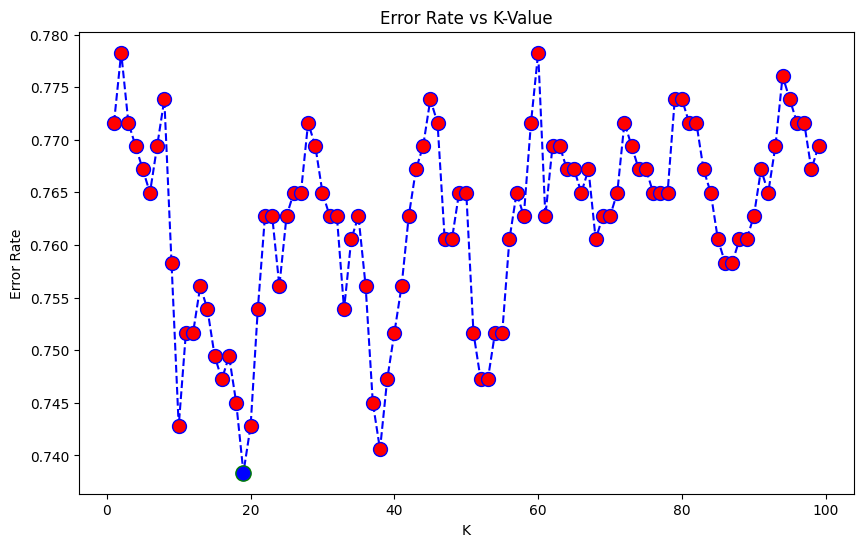

Min Error: 0.738359201773836, at K=18
Accuracy: 0.2616407982261641


In [42]:
plot_error_rate(error_rate,accuracy_score_list,directorio_de_imagenes=directorio_de_imagenes,save_image_file="KNN_model_features_selected")

In [43]:
#df.to_numpy

In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Salary Estimate Min', 'Salary Estimate Max',
       'Salary Estimate Mean', 'Sentences in Job Description'],
      dtype='object')

In [45]:
X=df[["Job Title","Company Name","Location","Headquarters","Size","Founded","Type of ownership","Industry","Sector","Revenue","Sentences in Job Description"]]

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [47]:
features_columnas_categoricas = ["Job Title","Company Name","Location","Headquarters","Size","Founded","Type of ownership","Industry","Sector",	"Revenue","Sentences in Job Description"]
one_hot_encoder = OneHotEncoder()
# passthrough significa que no modifique las otras columnas
transformer = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [48]:

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = .2, random_state = 42)

In [49]:
import matplotlib.pyplot as plt

# Provando con mas variables
- Este tiene aun un peor rendimiento que usando solo las variables que salieron con mayor significancia.

In [50]:
error_rate,accuracy_score_list=test_KNN(X_train,y_train,X_test,y_test,1,100)

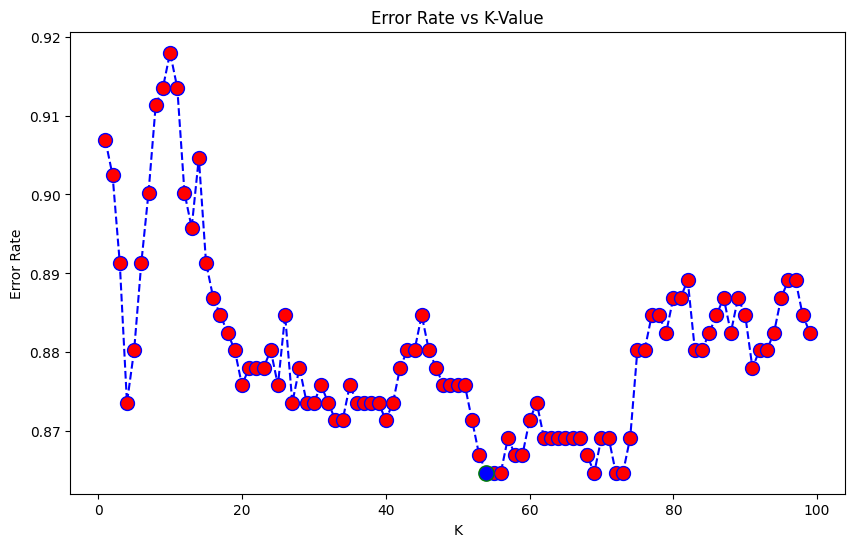

Min Error: 0.8647450110864745, at K=53
Accuracy: 0.1352549889135255


In [51]:
plot_error_rate(error_rate,accuracy_score_list,directorio_de_imagenes=directorio_de_imagenes,save_image_file="KNN_model_all_features")